<a href="https://colab.research.google.com/github/lcalderon-aceituno/BVERCam/blob/master/Johnson_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [2]:
!pip install whit-phys-util 1>/dev/null

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const

Mounted at /content/drive


# Connect to GitHub

In [4]:
repo = buc.local_repository("https://github.com/PS363-SP23/johnson-noise-team-einstein")

Cloning repository from GitHub.


# Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| LLE unit | Tech spin | NF1-A | NF1 62 |
| HLE unit | Tech spin | NF1-A | NF1 62 |
| Multimeter | Fluke | 179 | 49750067 |

# Observing Johnson noise

Set-up just Rin = 100 kohms and Rf = 1kohm

Rough estimate: 6 mV

filename = SDS00001

---------------------------
Low-pass connected to oscilloscope

Rough estimate: 8 mV

filename = SDS00003

---------------------------
Gain - Fine adjust = 80; switch = 10,1; AC on

Rough estimate: 4.2 V

filename = SDS00004

---------------------------
Clipping seems to occur around +/- 7V. Because the gain module seems to be broken below 80, we cannot keep our level to a third of the gain as suggested in the instructions. (This was reach when the fine adjust nob was switched to 100).


In [5]:
df_LLE = pd.read_csv("SDS00001.CSV", skiprows=[1], usecols=[0,1])
df_LLE.head()

,Source,CH1
0,-0.000045,0.0020
1,-0.000045,0.0024
2,-0.000045,0.0020
3,-0.000045,0.0020
4,-0.000045,0.0020


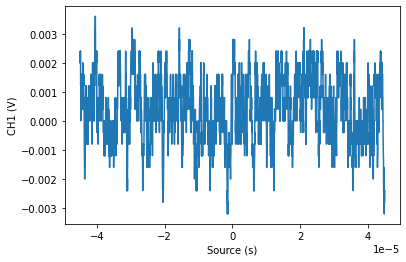

In [6]:
figLLE, axLLE = plt.subplots();
axLLE.plot(df_LLE['Source'], df_LLE['CH1']);
axLLE.set_xlabel("Source (s)");
axLLE.set_ylabel("CH1 (V)");

In [7]:
df_noGain = pd.read_csv("SDS00003.CSV", skiprows=[1], usecols=[0,1])
df_noGain.head()

,Source,CH1
0,-0.00009,0.008
1,-0.00009,0.008
2,-0.00009,0.016
3,-0.00009,0.008
4,-0.00009,0.000


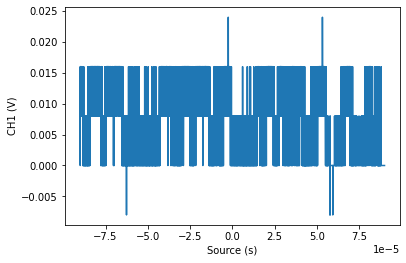

In [8]:
#this graph looks a little funky...
figNoGain, axNoGain = plt.subplots();
axNoGain.plot(df_noGain['Source'], df_noGain['CH1']);
axNoGain.set_xlabel("Source (s)");
axNoGain.set_ylabel("CH1 (V)");

In [9]:
df_gain = pd.read_csv("SDS00004.CSV", skiprows=[1], usecols=[0,1])
df_gain.head()

,Source,CH1
0,-0.00009,-0.4
1,-0.00009,-0.4
2,-0.00009,-0.6
3,-0.00009,-0.4
4,-0.00009,-0.6


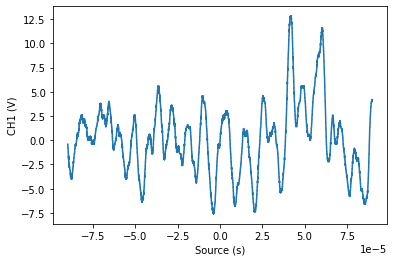

In [10]:
figGain, axGain = plt.subplots();
axGain.plot(df_gain['Source'], df_gain['CH1']);
axGain.set_xlabel("Source (s)");
axGain.set_ylabel("CH1 (V)");

As one would expect, the amplitude of the voltage graph increases as the signal is amplified. It also appears there underlying pattern smaller fluctuations follow become more bumpy themselves as the voltage is amplified.

# Quasi-autocorrelation function

In [11]:
df4A = pd.read_csv("4A.CSV", skiprows=[1], usecols=[0,1])
df4B = pd.read_csv("4B.CSV", skiprows=[1], usecols=[0,1])

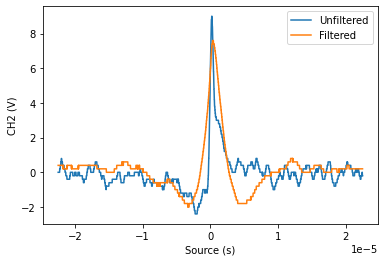

In [12]:
plt.plot(df4A['Source'], df4A['CH2'], label = 'Unfiltered');
plt.plot(df4B['Source'], df4B['CH2'], label = 'Filtered');
plt.xlabel("Source (s)");
plt.ylabel("CH2 (V)");
plt.legend();

As expected, the bandpass filter "smoothed" out the signal, only letting through the frequencies that made up the peak of the signal. It takes about 5 microseconds before the signal returns to 0 after the peak. 

# Square and average

In [13]:
dfpara = pd.read_csv("PARABOLA.CSV",skiprows=[1])
dfpgain = pd.read_csv("PARAGAIN.CSV", skiprows=[1])
dfpara.head()

,Source,CH1,CH2
0,-0.000045,0.32,-1.2
1,-0.000045,0.24,-1.0
2,-0.000045,0.24,-1.0
3,-0.000045,0.24,-1.0
4,-0.000045,0.24,-1.0


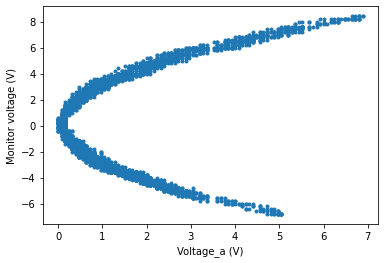

In [14]:
plt.plot(dfpara['CH1'], dfpara['CH2'],'.');
plt.ylabel('Monitor voltage (V)');
plt.xlabel('Voltage_a (V)');

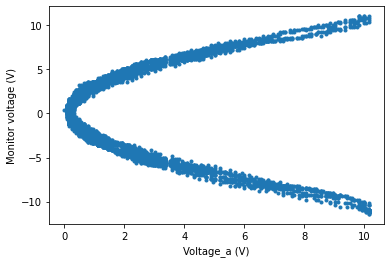

In [15]:
plt.plot(dfpgain['CH1'], dfpgain['CH2'],'.');
plt.ylabel('Monitor voltage (V)');
plt.xlabel('Voltage_a (V)');

At a higher gain, the parabola became more noisy and the data comes from a wider spread of voltages.

After connecting the output module to the multimeter, we noticed a reading that fluctuated around $1.145\ \mathrm{V}$ by $0.01\ \mathrm{V}$. The scale of the fluctuations stays roughly the same as the time constant is changed, but the reading becomes more stable at higher time constants.


Once the fine adjust is changed by a setting, the DMM reading comes to a new long-time average relatively quickly (some fraction of a second).

From our reading of $V_{meter}$, 

$<V_j^2> = V_{meter}*\frac{10\ \mathrm{V}}{(600*800)^2}$ = $1.145*\frac{10\ \mathrm{V}}{(600*800)^2} = 4.970*10^{-11}\ \mathrm{V^2}$

# Measuring Johnson noise

Due to restrictions on the hardware (it is broken), we could not find a way to make sure the voltage was within the 3 volt range and the analog meter was roughtly one volt. The voltage was significatly higher than desired (~$\ \mathrm{6V}$) in order to keep the analog meter reading within $1\ \mathrm{V}$.

In [16]:
dfjohn_data = pd.read_csv("johnson_noise_data.csv")
dfjohn_data

,Rin (ohms),G2,Meter-J+N (V),Meter-N (V)
0,100000,800,1.142,0.091
1,10000,800,0.347,0.091
2,1000,800,0.117,0.091
3,100,800,0.093,0.091
4,10,800,0.091,0.091


In [17]:
G1 = 600
G2 = 800

In [18]:
dfjohn_data['Vsq-J+N'] = dfjohn_data['Meter-J+N (V)']*10/(G1*G2)**2

In [19]:
dfjohn_data['Vsq-N'] = dfjohn_data[' Meter-N (V)']*10/(G1*G2)**2

In [20]:
dfjohn_data['Vsq-J'] = dfjohn_data['Vsq-J+N'] - dfjohn_data['Vsq-N']

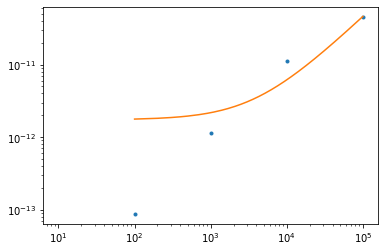

In [21]:
plt.xscale("log")
plt.yscale("log")
plt.plot(dfjohn_data['Rin (ohms)'], dfjohn_data['Vsq-J'], '.')

fitTable, fitFunc = buc.prettyPolyFit(dfjohn_data['Rin (ohms)'], dfjohn_data['Vsq-J']);
rfit = np.linspace(1e2,1e5,1000);
plt.plot(rfit, fitFunc(rfit));

Nyquist predicted that the slope of the above plot should be $4kT \Delta f$. Where $ \Delta f = 110961\ \mathrm{Hz}$ for this machine. Thus an experimental value of Boltzmann's constant can be found as:

In [31]:
slope = fitTable['slope']['value']
f = 110961
k_approx = slope/(4*f*298)
uk = fitTable['slope']['uncertainty']/(4*f*298)
print(f"Experimental value of k is {k_approx: .3} +- {uk:0.1}")

Experimental value of k is  3.35e-24 +- 6e-25


We can compare this to the literature value to get a percent error:

In [24]:
import scipy.constants as const

In [33]:
percenterr = abs(k_approx - const.k)/const.k*100
print(f"Our percent error is {percenterr: 0.3}%")

Our percent error is  75.7%
